In [1]:
import os
import pandas as pd
import numpy as np
import timeit
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.graph_objs as go
%matplotlib inline

from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation
from sklearn.model_selection import train_test_split


from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
x_train[0].shape

(28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### check few examples of actual image of Mnist dataset

fig, axes = plt.subplots(ncols=5, figsize=(15,3))
for ax, x in zip(axes, x_train[:5]):
    ax.imshow(x, cmap='gray', interpolation='none')

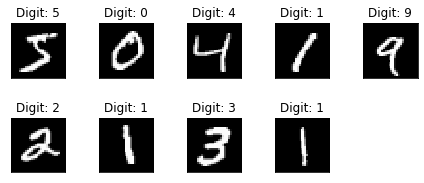

In [6]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3, 5, i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [7]:
# let's print the shape before we reshape and normalize
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels (height x width)
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print("X_train shape after reshpae", x_train.shape)
print("y_train shape after reshpae", y_train.shape)
print("X_test shape after reshpae", x_test.shape)
print("y_test shape after reshpae", y_test.shape)

#the pixel values range from 0 to 255
# normalizing the data to help with the training
x_train /= 255
x_test /= 255


X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
X_train shape after reshpae (60000, 784)
y_train shape after reshpae (60000,)
X_test shape after reshpae (10000, 784)
y_test shape after reshpae (10000,)


In [8]:
# print the final input shape ready for training
print("Train matrix shape", x_train.shape)
print("Test matrix shape", x_test.shape)

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [9]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.utils import to_categorical

In [11]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [12]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [13]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [14]:
model.compile(optimizer ='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

In [16]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2)

In [17]:
# training the model and saving metrics in history
history = model.fit(x_train, y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(x_valid, y_valid))



Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 7s - loss: 0.2729 - accuracy: 0.9179 - val_loss: 0.1476 - val_accuracy: 0.9538
Epoch 2/20
 - 6s - loss: 0.1108 - accuracy: 0.9669 - val_loss: 0.1058 - val_accuracy: 0.9692
Epoch 3/20
 - 6s - loss: 0.0755 - accuracy: 0.9759 - val_loss: 0.0908 - val_accuracy: 0.9730
Epoch 4/20
 - 7s - loss: 0.0590 - accuracy: 0.9807 - val_loss: 0.0933 - val_accuracy: 0.9746
Epoch 5/20
 - 7s - loss: 0.0456 - accuracy: 0.9850 - val_loss: 0.0844 - val_accuracy: 0.9771
Epoch 6/20
 - 7s - loss: 0.0405 - accuracy: 0.9869 - val_loss: 0.0851 - val_accuracy: 0.9765
Epoch 7/20
 - 7s - loss: 0.0341 - accuracy: 0.9889 - val_loss: 0.0872 - val_accuracy: 0.9774
Epoch 8/20
 - 7s - loss: 0.0319 - accuracy: 0.9895 - val_loss: 0.0870 - val_accuracy: 0.9784
Epoch 9/20
 - 7s - loss: 0.0282 - accuracy: 0.9905 - val_loss: 0.0899 - val_accuracy: 0.9768
Epoch 10/20
 - 7s - loss: 0.0248 - accuracy: 0.9915 - val_loss: 0.0888 - val_accuracy: 0.9787
Epoch 11/20
 - 7s -

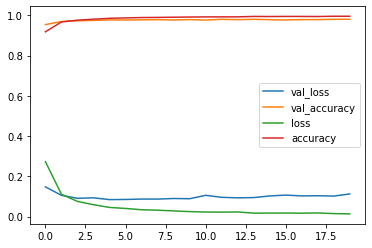

In [18]:
for name, value in history.history.items():
    plt.plot(value, label=name)
    
plt.legend()

In [19]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 60us/step


[0.08345282871511314, 0.9833999872207642]

In [20]:
test_pred = model.predict(x_test)
test_pred = np.argmax(test_pred, axis=1)

In [21]:
test_pred

array([7, 2, 1, ..., 4, 5, 6])

In [22]:
np.reshape(x_test, (-1, 28, 28)).shape

(10000, 28, 28)

In [23]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

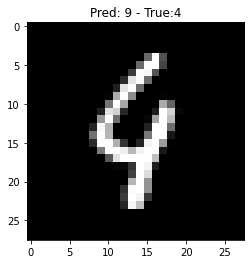

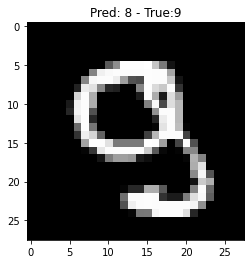

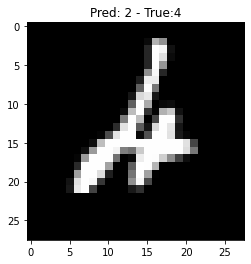

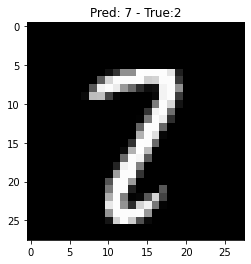

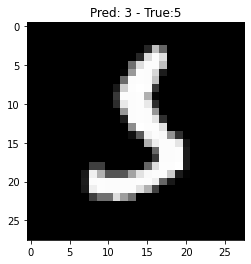

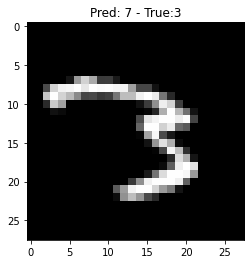

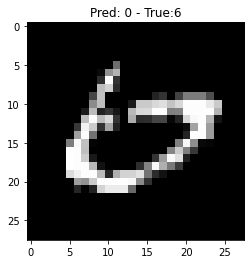

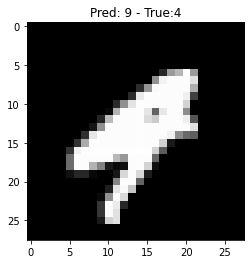

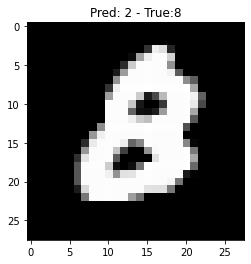

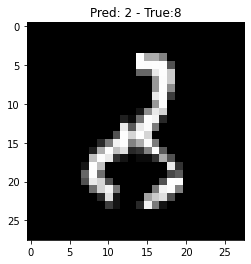

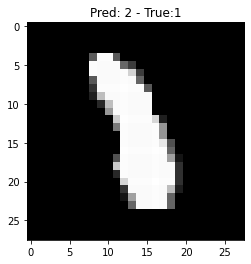

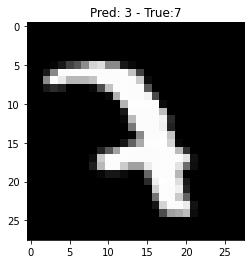

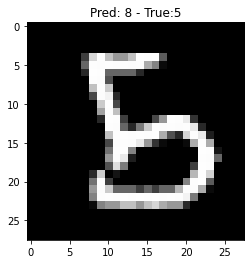

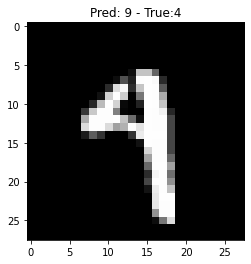

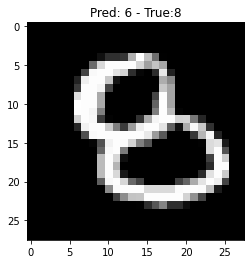

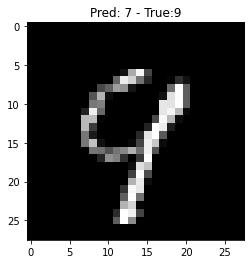

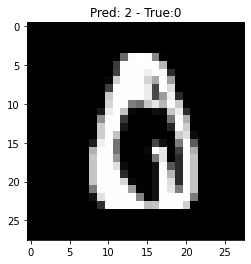

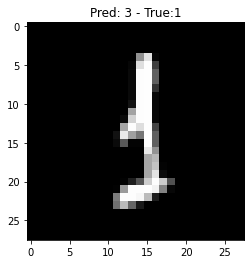

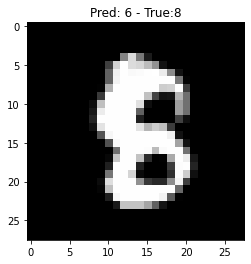

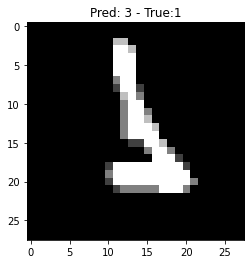

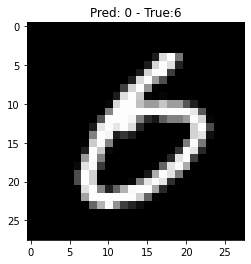

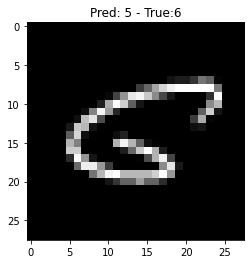

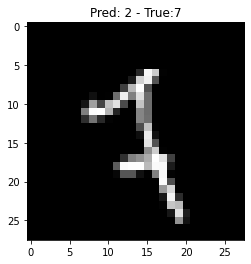

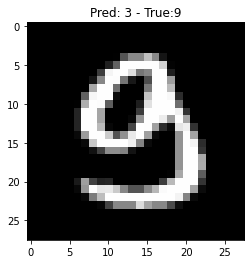

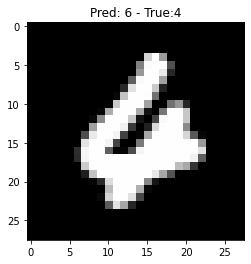

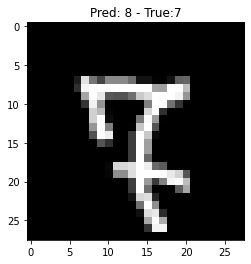

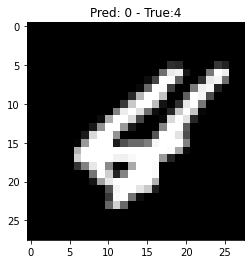

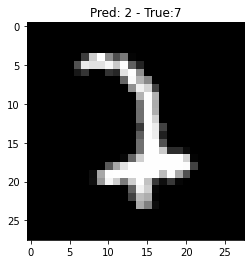

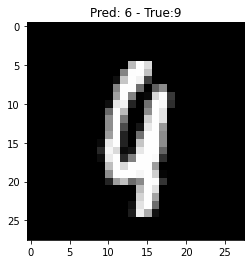

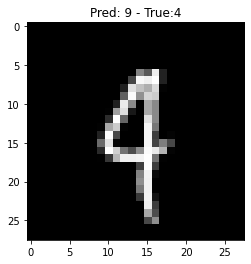

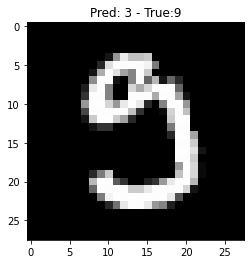

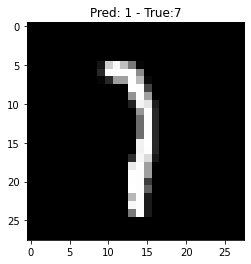

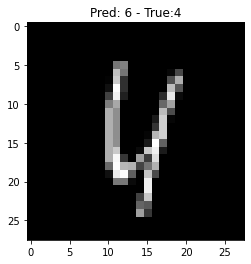

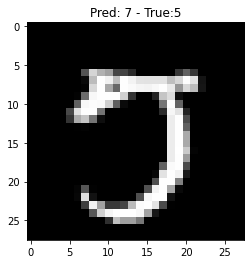

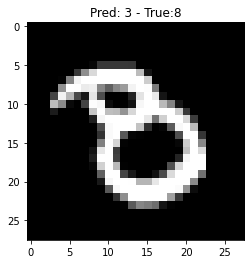

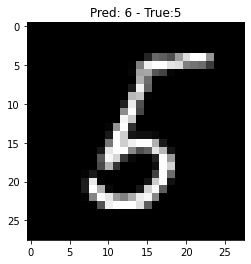

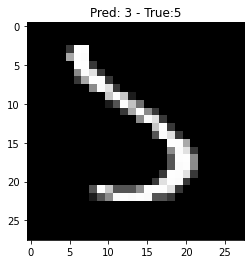

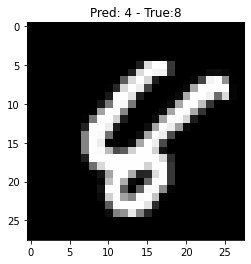

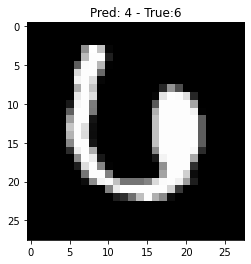

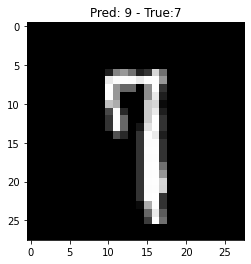

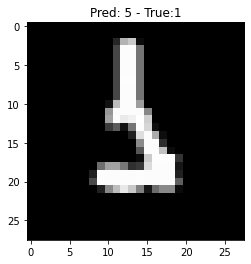

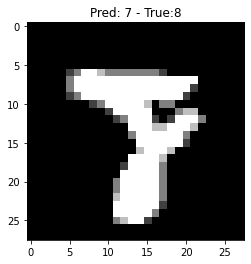

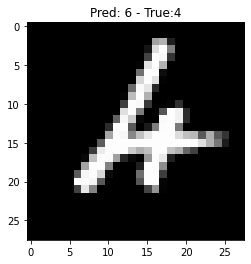

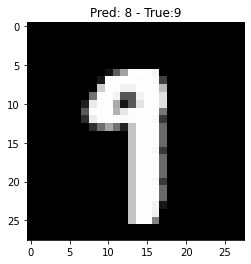

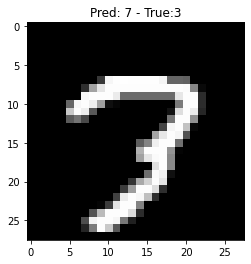

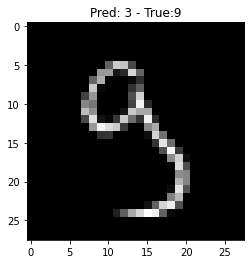

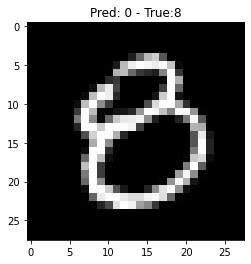

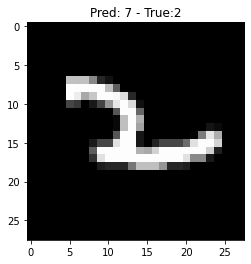

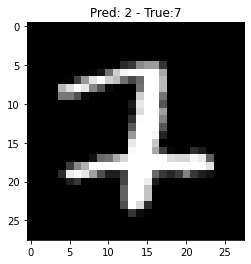

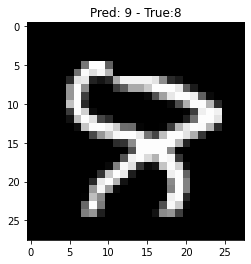

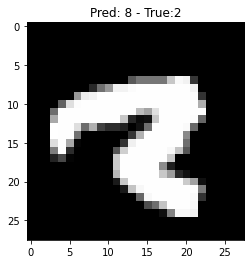

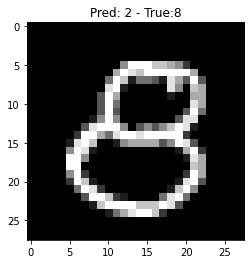

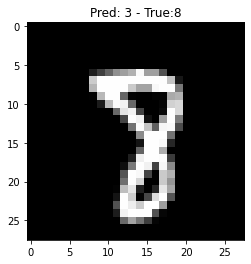

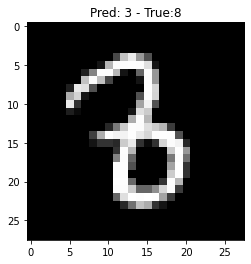

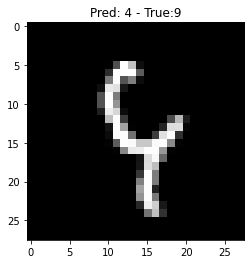

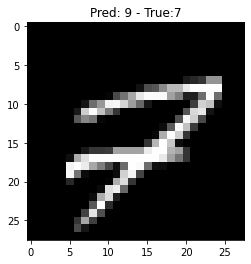

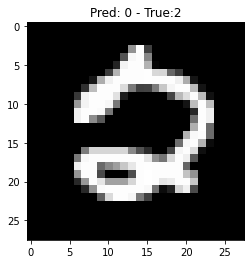

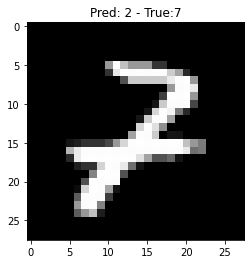

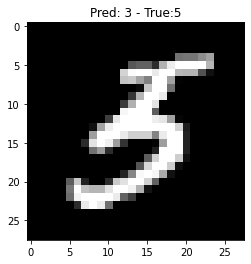

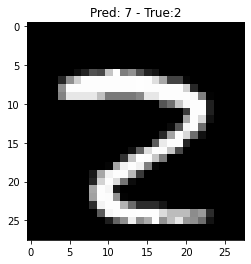

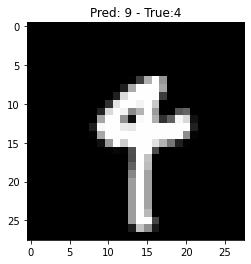

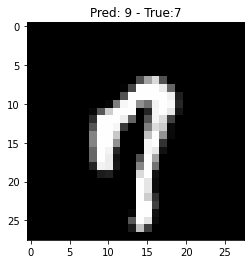

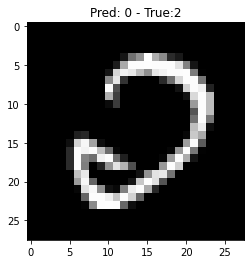

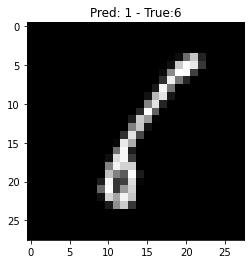

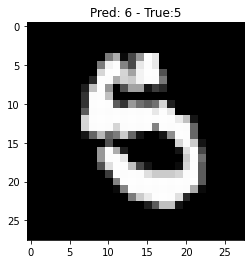

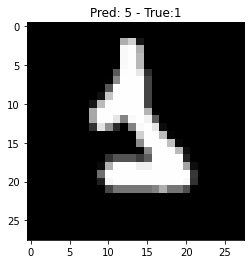

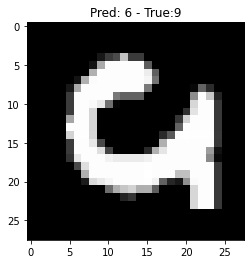

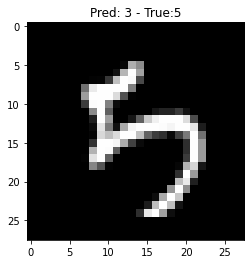

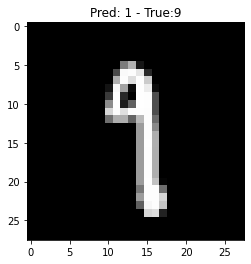

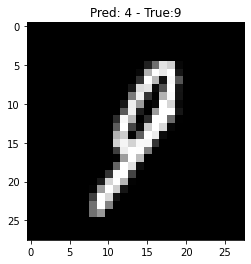

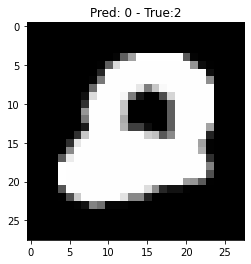

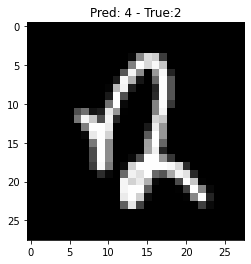

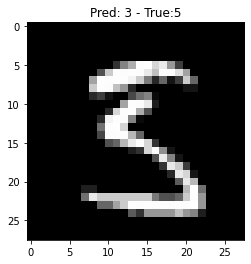

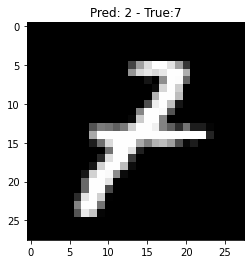

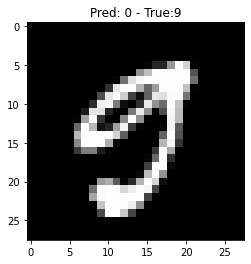

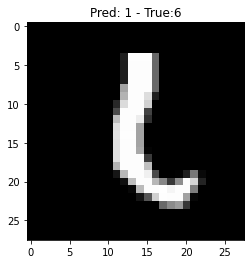

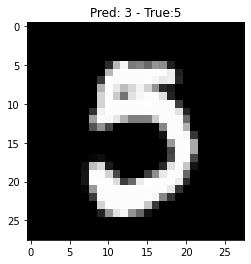

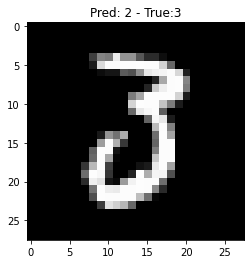

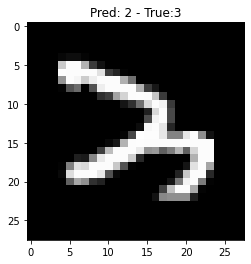

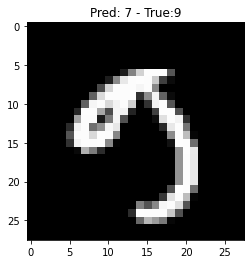

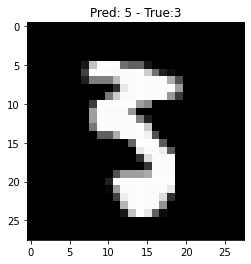

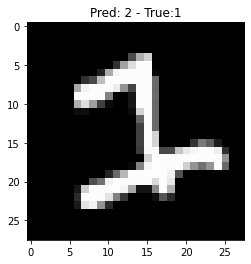

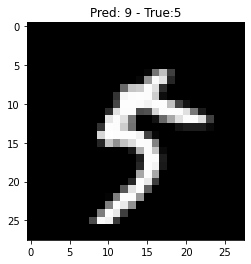

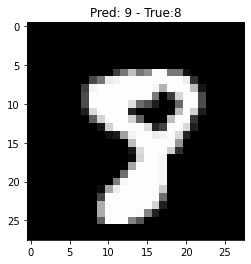

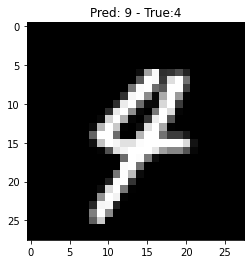

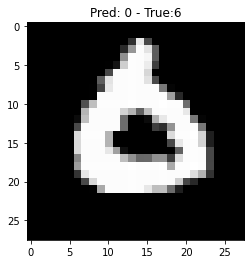

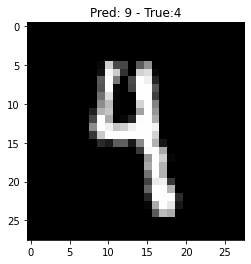

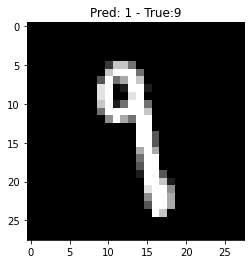

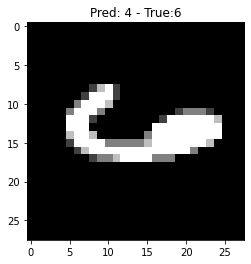

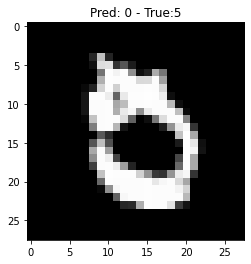

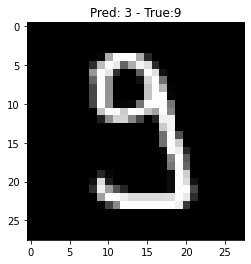

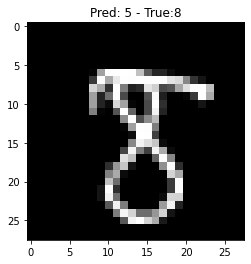

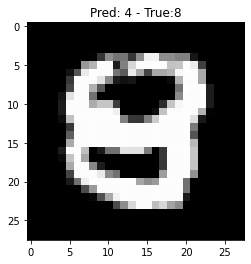

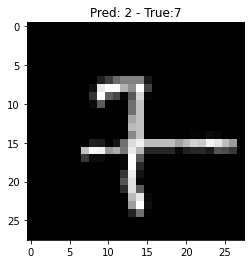

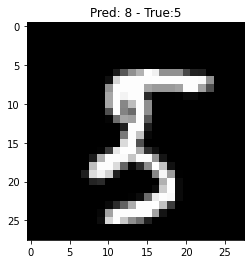

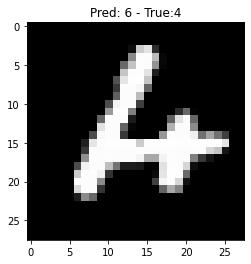

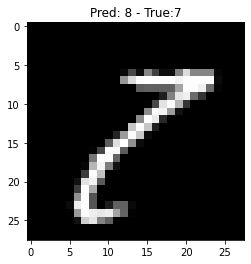

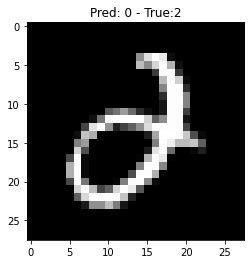

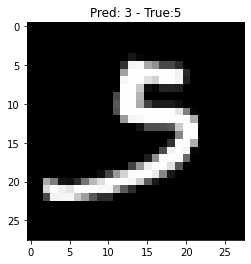

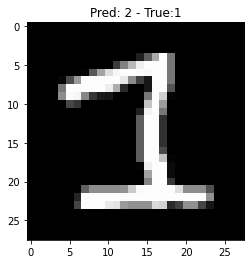

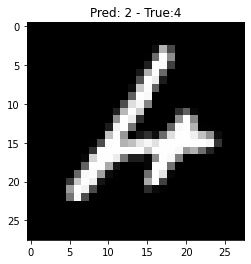

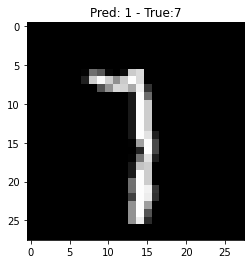

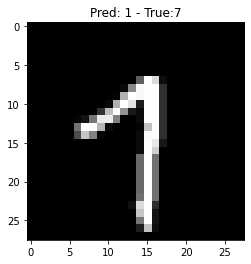

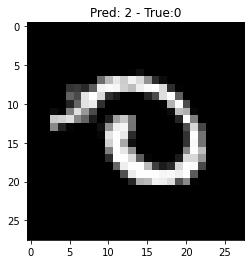

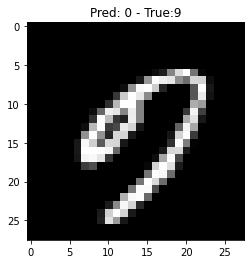

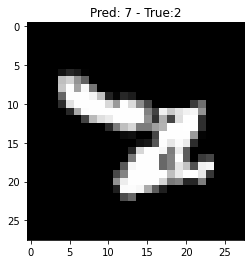

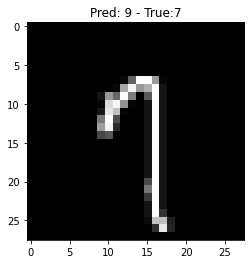

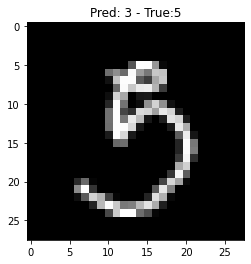

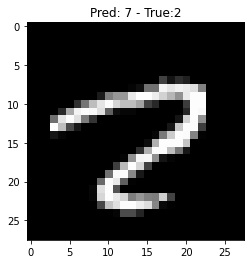

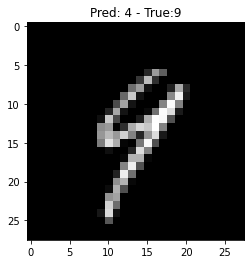

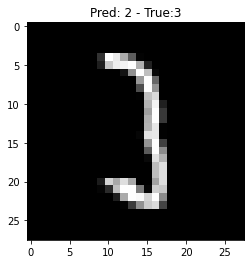

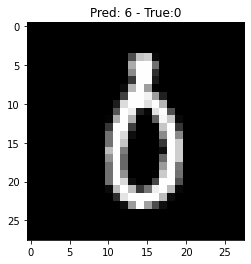

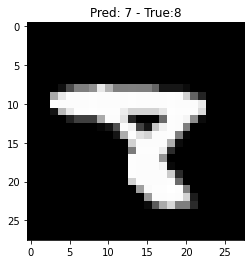

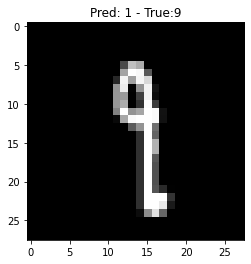

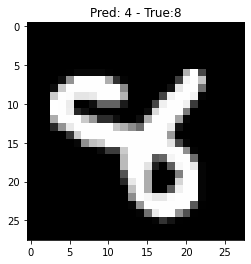

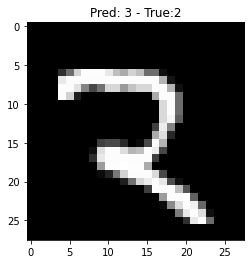

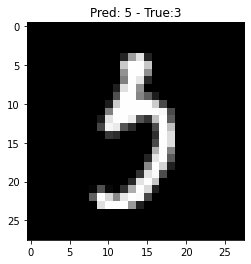

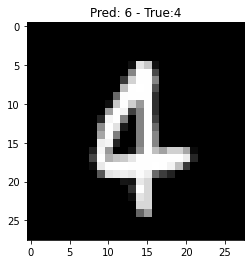

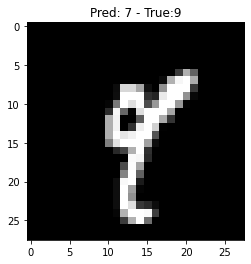

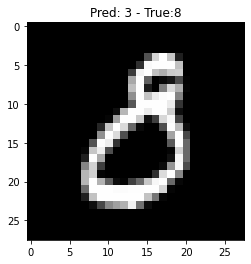

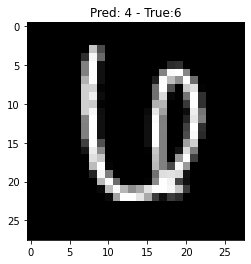

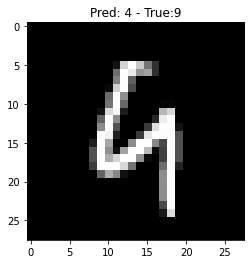

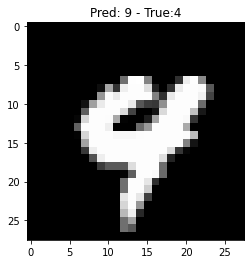

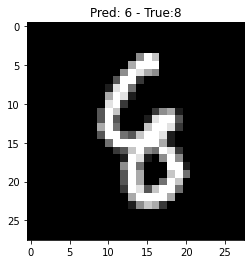

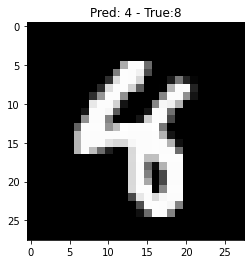

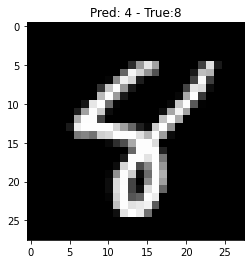

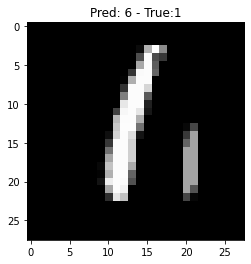

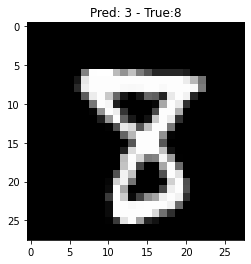

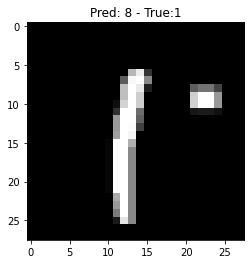

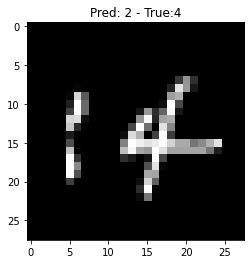

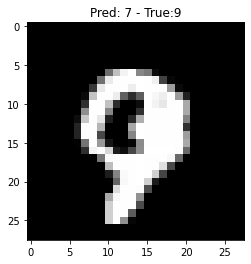

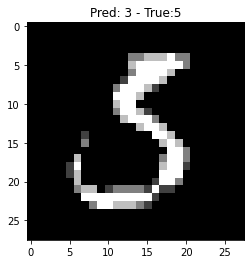

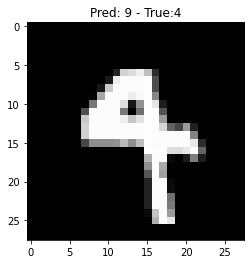

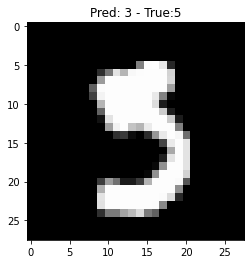

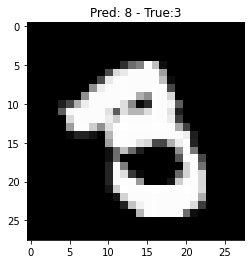

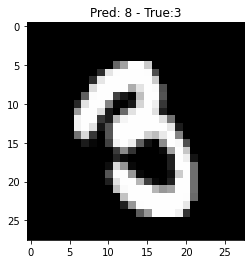

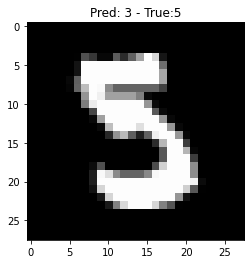

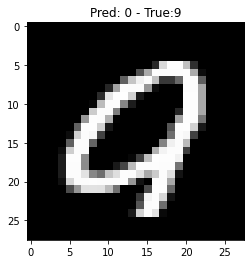

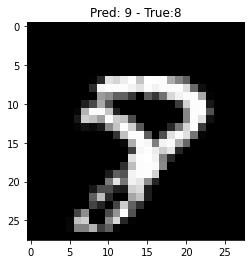

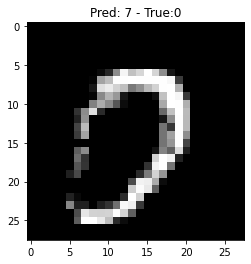

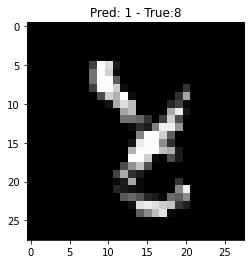

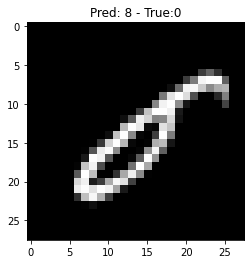

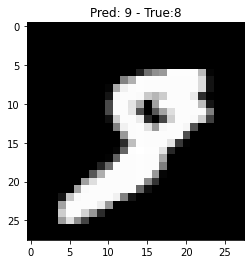

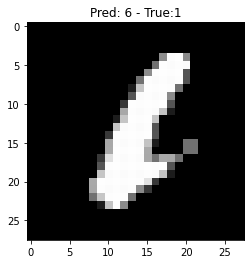

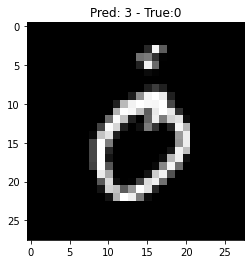

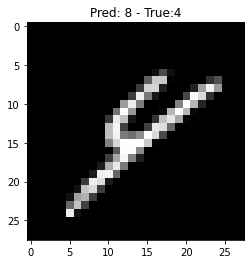

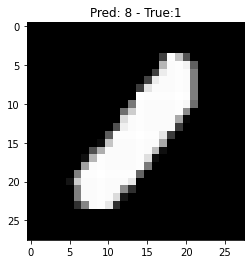

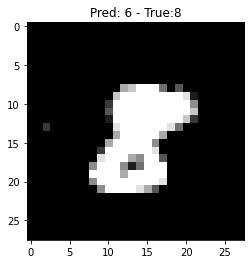

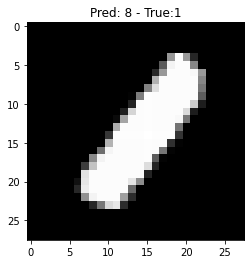

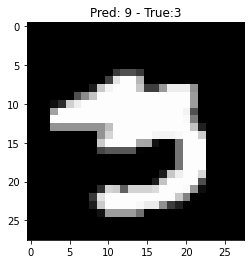

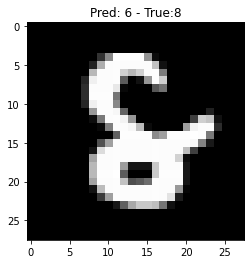

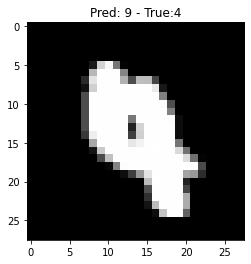

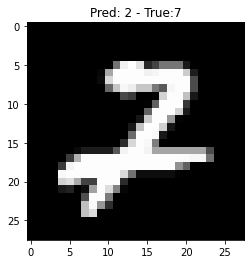

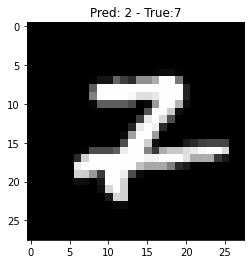

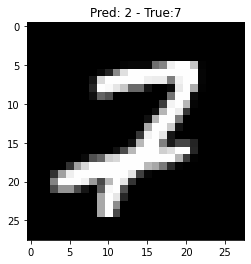

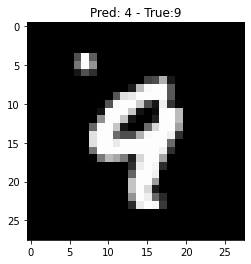

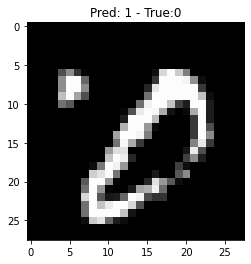

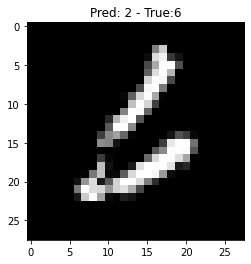

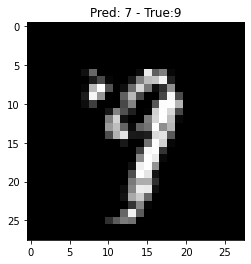

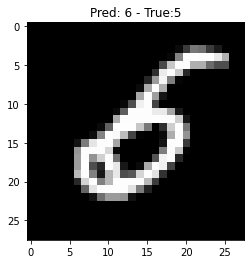

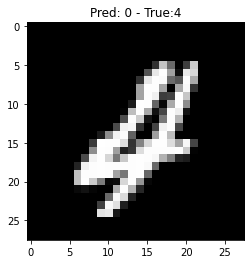

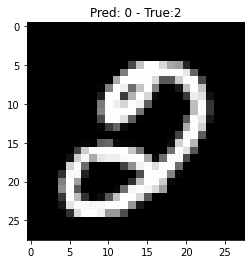

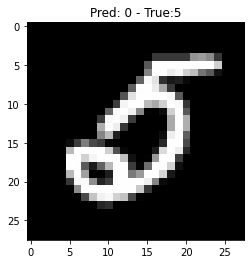

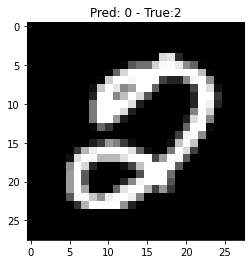

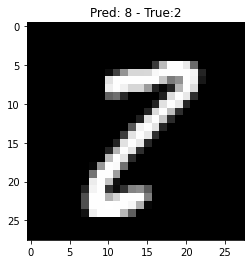

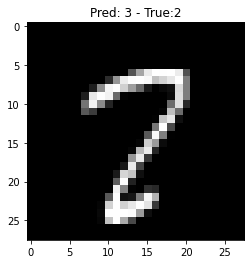

In [24]:
for pred, true, image in zip(test_pred, y_test, np.reshape(x_test, (-1, 28, 28)) ):
    if pred!= np.argmax(true):
        plt.imshow(image, cmap='gray')
        plt.title('Pred: {} - True:{}'.format(pred, np.argmax(true)))
        plt.show()

In [25]:
# saving the model
save_dir = os.getcwd()
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)


Saved trained model at /Users/reejungkim/Documents/Git/Image classification/keras_mnist.h5 


# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig